# Chapter 10 : Frequency Response Techniques
---

In [1]:
import sys

if (path := "C:/Users/Tom/pycharm-projects/python-control") not in sys.path:
    sys.path.append(path)

import numpy as np

from python_control import (
    s, TransferFunction,
    FeedbackSystem,
    FrequencyResponse,
    ClosedLoopTransientResponse,
    get_percent_overshoot,
    create_time_delay,
    plot_bode_diagrams,
    LineChart
)

## 10.2 : Asymptotic Approximations: Bode Plots

### Example 10.2: Bode Plots for Ratio of First-Order Factors 

Given the open-loop transfer function $G(s)$:

In [2]:
G = TransferFunction((s + 3) / (s * (s + 1) * (s + 2)))

Create a `FrequencyResponse` object with this transfer function:

In [3]:
G_jw = FrequencyResponse(G)

Lets evaluate the frequency response of the transfer function at a certain angular frequency $\omega$.

In [4]:
M, M_dB, phi = G_jw.evaluate(0.1)
print(
    f"- magnitude at frequency 0.1 rad/s = {M:.3f}",
    f"- magnitude in decibels = {M_dB:.3f} dB",
    f"- phase angle = {phi:.3f}°",
    sep='\n'
)

- magnitude at frequency 0.1 rad/s = 14.915
- magnitude in decibels = 23.473 dB
- phase angle = -96.664°


Plot the Bode diagram of the frequency response between a lower and upper limit of angular frequencies.

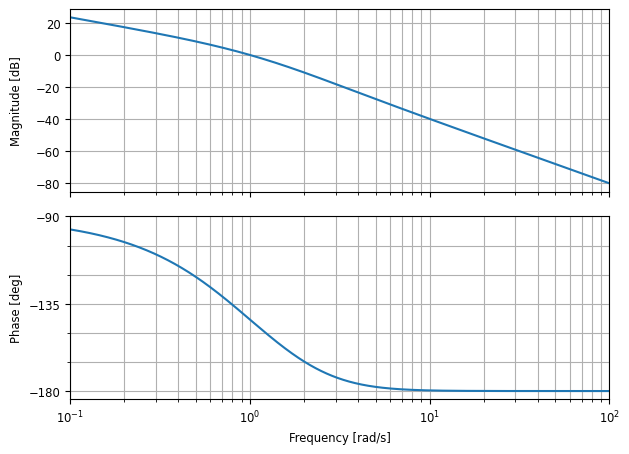

In [5]:
G_jw.bode_plot(omega_limits=(0.1, 100))

### Example 10.3 : Bode Plots for Ratio of First- and Second-Order Factors

Plot the Bode diagram of the open-loop transfer function:

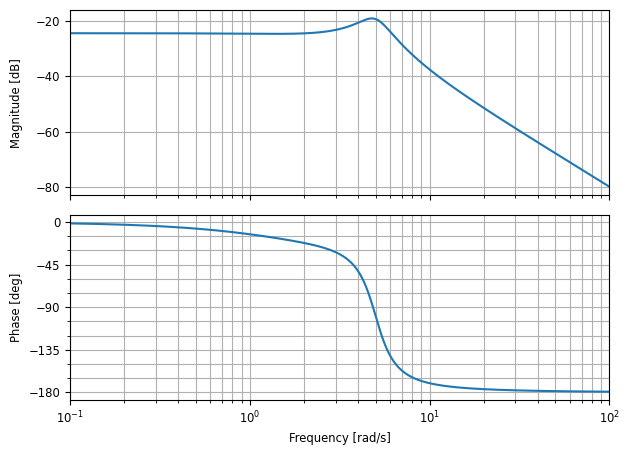

In [6]:
G = TransferFunction((s + 3) / ((s + 2) * (s**2 + 2*s + 25)))
G_jw = FrequencyResponse(G)
G_jw.bode_plot()

## 10.4 : Sketching the Nyquist Diagram

### Example 10.4 : Sketching a Nyquist Diagram

Sketch the Nyquist diagram for the system in the figure below.

![block diagram of speed control system for example 10.4](./images/example_10-4.png)

The open-loop gain $K$ is separated from the transfer function $G(s)$:

In [7]:
K = 500
G = TransferFunction(1 / ((s + 10) * (s + 3) * (s + 1)))

The `FrequencyResponse` object of the transfer function $G(s)$ is instantiated without the open-loop gain $K$.

In [8]:
G_jw = FrequencyResponse(G)

The Nyquist diagram of the open-loop frequency response can be drawn for different values of open-loop gain $K$.

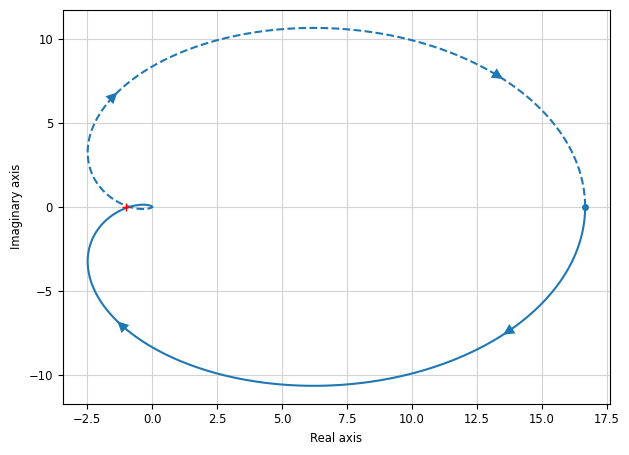

In [9]:
G_jw.nyquist_plot(K, omega_limits=(0.001, 100))

## 10.5 : Stability via the Nyquist Diagram

### Example 10.6 : Range of Gain for Stability via the Nyquist Criterion

For the unity-feedback system where 
$$
G\left( s \right) = \frac{K}{{s\left( {s + 3} \right)\left( {s + 5} \right)}}
$$
find the range of gain $K$ for stability, instablity, and the value of gain for marginal stability. For marginal stability, find the frequency of oscillation.

In [10]:
G = TransferFunction(1 / (s * (s + 3) * (s + 5))) 
G_jw = FrequencyResponse(G)
K_ms, omega_ms = G_jw.marginal_stability_gain
K_rs = G_jw.stability_gain_range

print(
    f"- The system is marginally stable for K = {K_ms:.1f} with frequency of oscillation = {omega_ms:.3f} rad/s.",
    f"- The system is stable between {K_rs[0]} < K < {K_rs[1]:.1f}",
    sep='\n'
)

- The system is marginally stable for K = 120.0 with frequency of oscillation = 3.873 rad/s.
- The system is stable between 0 < K < 120.0


### Example 10.7 : Stability Design via Mapping Positive $j\omega$-Axis

Find the range of gain for stability and instability, and the gain for mariginal stability for the unity-feedback system where
$$
G\left( s \right) = \frac{K}{{\left( {{s^2} + 2s + 2} \right)\left( {s + 2} \right)}}
$$
For marginal stability, find the angular frequency of oscillation.

In [11]:
G = TransferFunction(1 / ((s**2 + 2*s + 2) * (s + 2)))
G_jw = FrequencyResponse(G)
K_ms, omega_ms = G_jw.marginal_stability_gain
K_rs = G_jw.stability_gain_range

print(
    f"- The system is marginally stable for K = {K_ms:.1f}, with frequency of oscillation = {omega_ms:.3f} rad/s.",
    f"- The system is stable between {K_rs[0]} < K < {K_rs[1]:.1f}",
    sep='\n'
)

- The system is marginally stable for K = 20.0, with frequency of oscillation = 2.449 rad/s.
- The system is stable between 0 < K < 20.0


## 10.6 : Gain Margin and Phase Margin via the Nyquist Diagram

### Example 10.8 : Finding Gain and Phase Margins

Find the gain and phase margin for the system of example 10.7 if $K$ = 6.

In [12]:
K = 6
K_m, omega_180 = G_jw.gain_margin(K)
phi_m, omega_1 = G_jw.phase_margin(K)

print(f"- gain margin = {K_m:.2f} dB")
print(f"- phase margin = {phi_m:.1f}°")
print(f"- the open-loop frequency response phase angle becomes 180° at frequency = {omega_180:.3f} rad/s")
print(f"- the open-loop frequency response has magnitude 1 at frequency = {omega_1:.3f} rad/s")

- gain margin = 10.46 dB
- phase margin = 67.7°
- the open-loop frequency response phase angle becomes 180° at frequency = 2.449 rad/s
- the open-loop frequency response has magnitude 1 at frequency = 1.253 rad/s


## 10.7 : Stability, Gain Margin, and Phase Margin via Bode Plots

### Example 10.9 : Range of Gain for Stability via Bode Plots

Determine the range of $K$ within which the unity-feedback system is stable with:
$$
G\left( s \right) = \frac{K}{{\left( {s + 2} \right)\left( {s + 4} \right)\left( {s + 5} \right)}}
$$

In [13]:
G = TransferFunction(1 / ((s + 2) * (s + 4) * (s + 5)))
G_jw = FrequencyResponse(G)

print(G_jw.stability_gain_range)

(0, 377.99999999999994)


The system is stable for 0 < $K$ < 378.

### Example 10.10 : Gain and Phase Margins from Bode Plots

If $K$ = 200 in example 10.9, find the gain margin and phase margin.

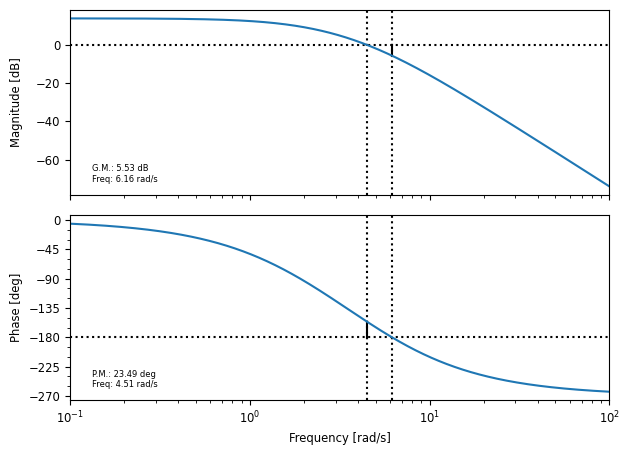

In [14]:
G_jw.bode_plot(K=200, display_margins='overlay', wrap_phase=False)

In [15]:
K_m, omega_180 = G_jw.gain_margin(K=200)
phi_m, omega_1 = G_jw.phase_margin(K=200)

print(f"- gain margin = {K_m:.2f} dB")
print(f"- phase margin = {phi_m:.1f}°")
print(f"- the open-loop frequency response phase angle becomes 180° at frequency = {omega_180:.3f} rad/s")
print(f"- the open-loop frequency response has magnitude 1 at frequency = {omega_1:.3f} rad/s")

- gain margin = 5.53 dB
- phase margin = 23.5°
- the open-loop frequency response phase angle becomes 180° at frequency = 6.164 rad/s
- the open-loop frequency response has magnitude 1 at frequency = 4.507 rad/s


## 10.9 : Relation between Closed- and Open-Loop Frequency Responses

### Example 10.11 : Closed-Loop Frequency Response from Open-Loop Frequency Response

Find the closed-loop frequency response of the unity-feedback system where:
$$
G\left( s \right) = \frac{{50}}{{s\left( {s + 3} \right)\left( {s + 6} \right)}}
$$

In [16]:
K = 50
G = TransferFunction(1 / (s * (s + 3) * (s + 6)))

Open-loop frequency response:

In [17]:
G_jw = FrequencyResponse(G)

Closed-loop frequency response:

In [19]:
T_jw = FrequencyResponse(FeedbackSystem(K * G).closed_loop)

**Plot Open-Loop and Closed-Loop Frequency Response in Complex Plane**

In [20]:
omegas = np.linspace(1e-3, 1e3, int(1e5))
G_jw_values = G_jw(omegas, K)
T_jw_values = T_jw(omegas)

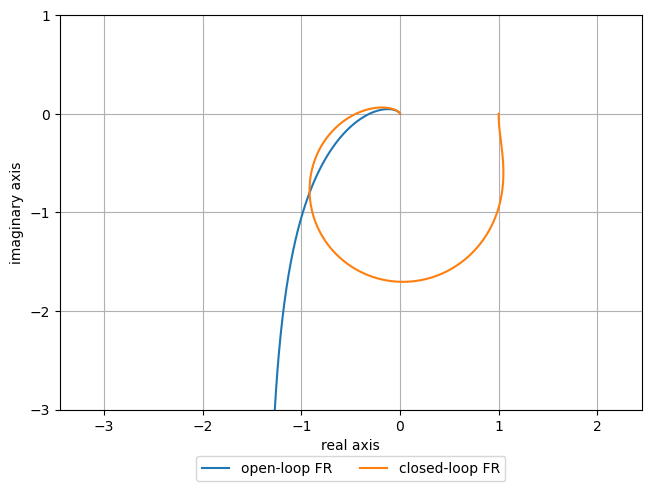

In [21]:
c = LineChart()
c.add_xy_data(
    label='open-loop FR',
    x1_values=G_jw_values.real,
    y1_values=G_jw_values.imag
)
c.add_xy_data(
    label='closed-loop FR',
    x1_values=T_jw_values.real,
    y1_values=T_jw_values.imag
)
c.x1.axes.axis('equal')
c.x1.scale(-3, 2, 1)
c.y1.scale(-3, 1, 1)
c.x1.add_title('real axis')
c.y1.add_title('imaginary axis')
c.add_legend()
c.show()

## 10.10 : Relation Between Closed-Loop Transient and Open-Loop Frequency Responses

### Example 10.12 : Percent Overshoot from Open-Loop Frequency Response

*Find the damping ratio and the percent overshoot expected from the unity-feedback system of example 10.11 using the open-loop frequency response and the $M$ circles.*

We can solve this example directly by using our `FrequencyResponse` object `T_jw` from example 10.11 and the `ClosedLoopTransientResponse` class, which implements relationships beween the closed-loop frequency response and the transient response of the feedback system.

From `FrequencyResponse` object `T_jw` we can get the peak magnitude of the closed-loop frequency response and the angular frequency at which this peak occurs. A relationship exists between the peak magnitude of the closed-loop frequency response and the damping ratio of a unity-feedback system.

In [22]:
M_p, omega_p = T_jw.get_peak_magnitude()
print(
    f"-peak magnitude = {M_p:.3f}",
    f"-peak frequency = {omega_p:.3f} rad/s",
    sep='\n'
)

-peak magnitude = 1.706
-peak frequency = 2.328 rad/s


With the `solve` method of class `ClosedLoopTransientResponse`, we can get the transient response characteristics of the feedback system if we know the peak magnitude and peak frequency of its closed-loop frequency response. The method `solve` (a class method) returns an instance of the class `ClosedLoopTransientResponse`. Through properties of this instance we can get at the different transient response characteristics: damping ratio, settling time, peak time, natural frequency. Using the function `get_percent_overshoot`, we get the percent overshoot that corresponds with the value of the damping ratio. 

In [23]:
cltr = ClosedLoopTransientResponse.solve(M_p=M_p, omega_p=omega_p)
print(
    f"- closed-loop damping ratio = {cltr.zeta:.2f}",
    f"- percent overshoot = {get_percent_overshoot(cltr.zeta):.0f} %",
    sep='\n'
)

- closed-loop damping ratio = 0.31
- percent overshoot = 36 %


### Example 10.13 : Settling Time and Peak Times from Open-Loop Frequency Response

*Estimate the settling time and peak time of the unity-feedback system of example 10.11.*

This example continues on the previous example. The settling time and peak time are properties of the `ClosedLoopTransientResponse` object we got back in the previous example.

In [24]:
print(
    f"- settling time = {cltr.T_s:.2f} s",
    f"- peak time = {cltr.T_p:.2f} s",
    sep='\n'
)

- settling time = 5.02 s
- peak time = 1.28 s


## 10.12 : Systems with Time Delay

### Example 10.15 : Frequency Response Plots of a System with Time Delay

A time delay can be added to a transfer function with the function `create_time_delay`. This function uses a Padé approximation to represent a time delay ${e^{ - sT}}$ in the $s$-domain. The magnitude of the frequency response of a transfer function is not affected by a time delay, but the phase angle is. To check the accuracy of the time delay approximation, we can draw the Bode diagram of a transfer function without and with the time delay. The magnitude plot of both should nearly coincide over the range of frequencies we're interested in. If not, a different Padé approximation could be defined. Check the docstring of the function `create_time_delay` for this (this can be done easily if you turn on Contextual Help in Jupyter Lab).

Transfer function without time delay:

In [25]:
G = TransferFunction(1 / (s * (s + 1) * (s + 10)))

Transfer function with a time delay of 1 second:

In [26]:
dT = create_time_delay(T=1.0, n=6)
G_dT = dT * G

Bode diagram of both transfer functions.

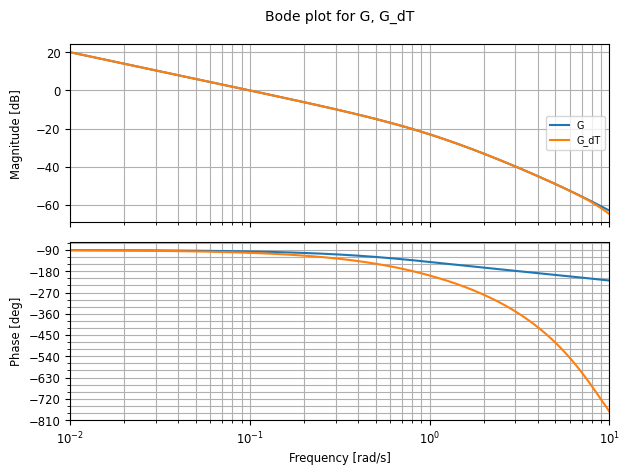

In [27]:
plot_bode_diagrams(
    [G, G_dT],
    omega_limits=(0.01, 10),
    names=['G', 'G_dT'],
    wrap_phase=False
)

Unit step response of both transfer functions.

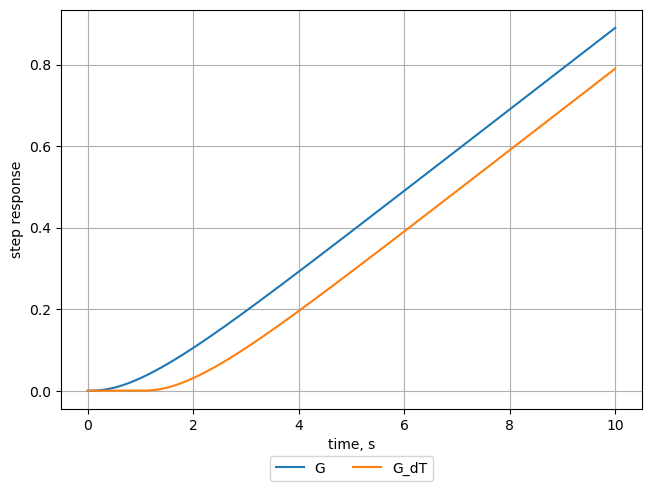

In [28]:
step_resp_G = G.unit_step_response()
step_resp_G_dT = G_dT.unit_step_response()

c = LineChart()
c.add_xy_data(
    label='G',
    x1_values=step_resp_G[0],
    y1_values=step_resp_G[1]
)
c.add_xy_data(
    label='G_dT',
    x1_values=step_resp_G_dT[0],
    y1_values=step_resp_G_dT[1]
)
c.add_legend()
c.x1.add_title('time, s')
c.y1.add_title('step response')
c.show()